**Problem statement**

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
* One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
* The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
* However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Travel.csv')

**Show Top 5 Records**

In [ ]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


**Shape of the dataset**

In [ ]:
df.shape

(4888, 20)

**Summary of the dataset or statistical Analysis**

In [ ]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


**Check Datatypes in the dataset.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Exploring Data**

In [ ]:
# define numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
# print th3e columns
print('We have {} numericalfeatures : {}'.format(len(numeric_features),numeric_features))
print('We have {} categoricalfeatures : {}'.format(len(categorical_features),categorical_features))

We have 14 numericalfeatures : ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
We have 6 categoricalfeatures : ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [ ]:
#proportion of the count
for col in categorical_features:
  print(df[col].value_counts(normalize=True) * 100)
  print('------------------------------------------')

TypeofContact
Self Enquiry       70.820481
Company Invited    29.179519
Name: proportion, dtype: float64
------------------------------------------
Occupation
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: proportion, dtype: float64
------------------------------------------
Gender
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: proportion, dtype: float64
------------------------------------------
ProductPitched
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: proportion, dtype: float64
------------------------------------------
MaritalStatus
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: proportion, dtype: float64
------------------------------------------
Designation
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP     

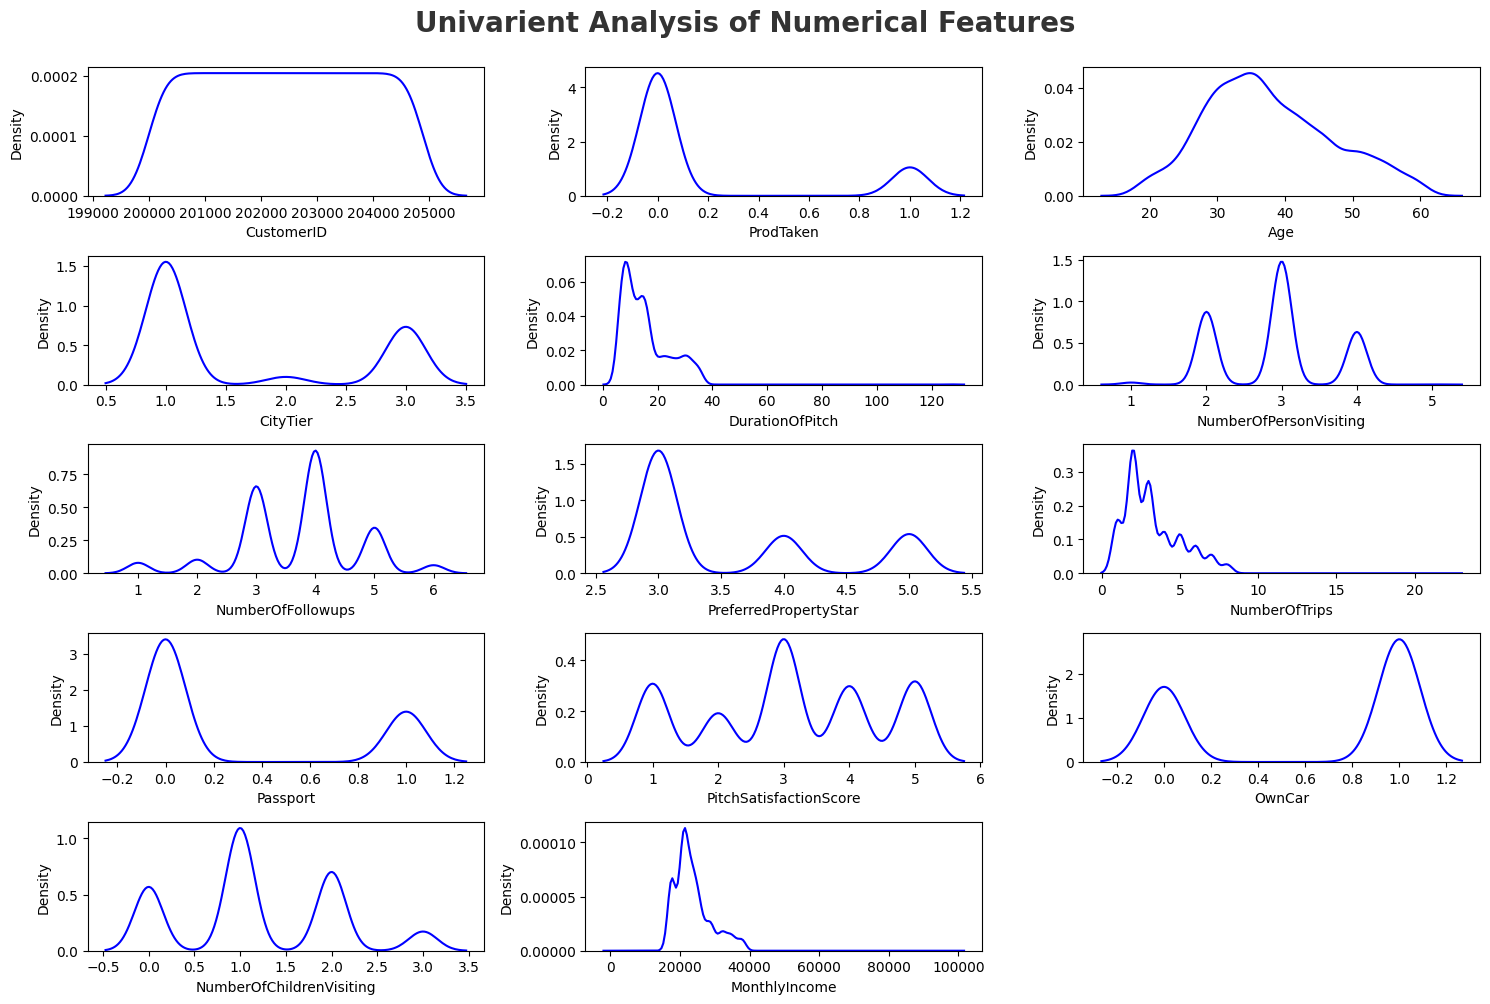

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
plt.suptitle('Univarient Analysis of Numerical Features',fontsize = 20,fontweight = 'bold',alpha = 0.8,y = 1)
for i in range(0,len(numeric_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x = df[numeric_features[i]],color = 'blue')
  plt.xlabel(numeric_features[i])
  plt.tight_layout()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
# Copy the entire dataframe
df_types_converted = df.copy()

# Convert specific columns to 'object' type
columns_to_convert = ['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups',
                      'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore']

df_types_converted[columns_to_convert] = df_types_converted[columns_to_convert].astype('object')

In [ ]:
df_types_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   object 
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   object 
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   object 
 9   NumberOfFollowups         4843 non-null   object 
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   object 
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   object 
 14  Passport

** Insights:**
   
   * I changed the type used on my understanding and post doing univariaent analysis.

**Univarianent Analysis of Categorical Features.**

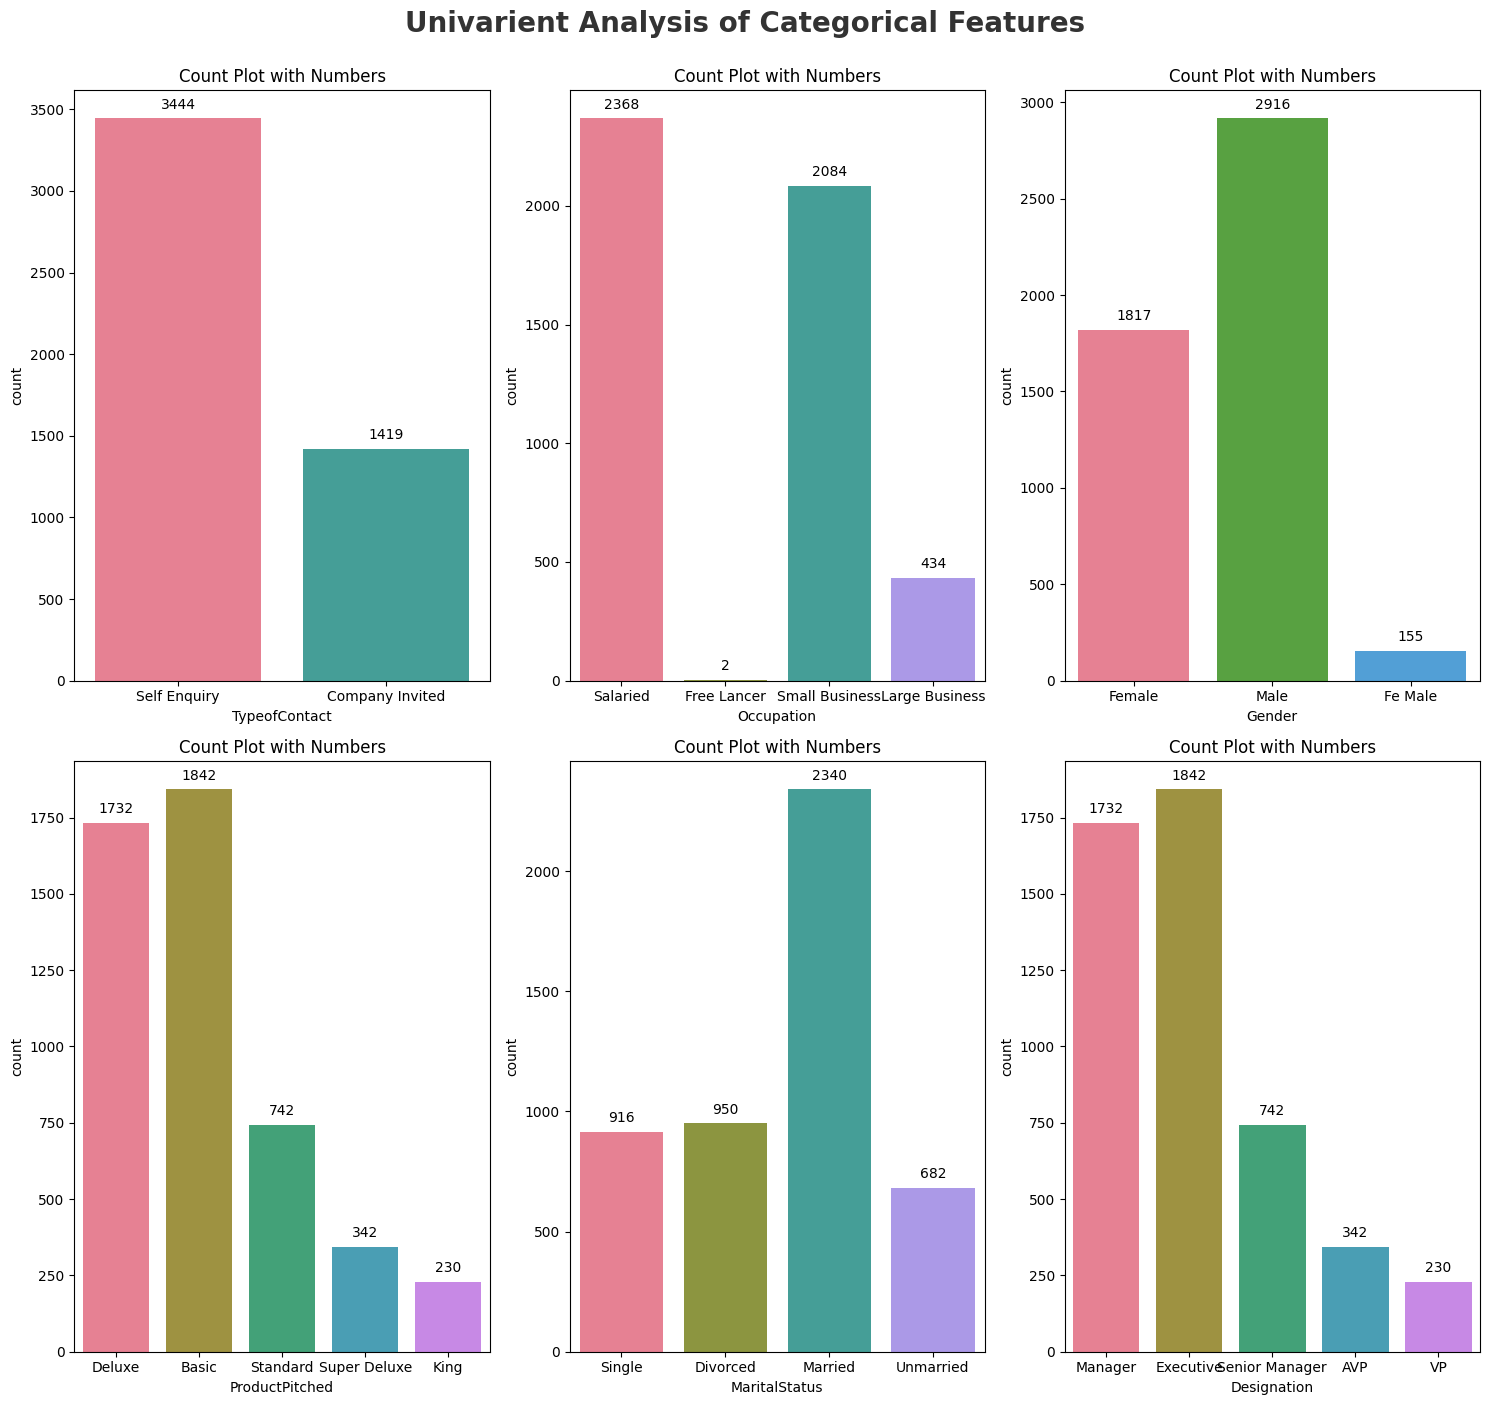

**Multivariate Analysis.**

In [ ]:
df[(numeric_features[1:])].corr().T

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545
PitchSatisfactionScore,0.051394,0.018510,-0.042160,-0.002880,-0.019581,0.004054,-0.022701,-0.004378,0.002926,1.000000,0.068850,0.000878,0.030421


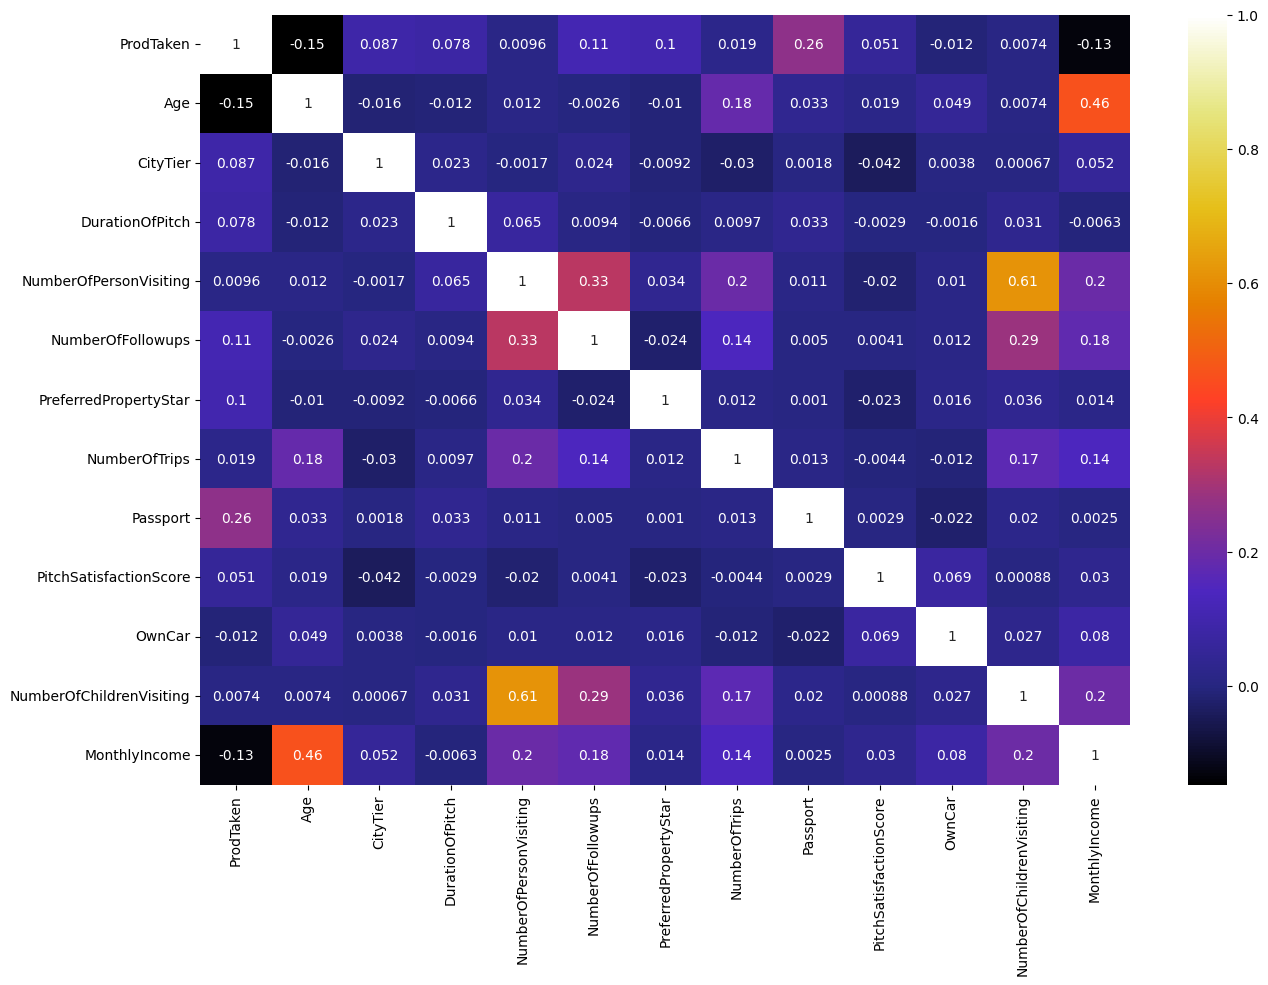

In [ ]:
plt.figure(figsize= (15,10))
sns.heatmap(df[(numeric_features[1:])].corr().T ,cmap = 'CMRmap',annot = True)
plt.show()

**Report**

 * Our target column ProdTaken has a weak correlation on Age and Income.
 * The NumberOfFollowups and Passport columns also a weak positive correlation with ProdTaken.
 * TheNumberofPersonVisiting and NumberOfChildrenVisting columns have a strong enough positive correlations.
 * TheNumberofPersonVisiting and NumberOfFollowups columns has a positvely correlated.

**Check Multicolinearlity for Categorical features.**

In [ ]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
  if chi2_contingency(pd.crosstab(df['ProdTaken'],df[feature]))[1] < 0.05:
    chi2_test.append("Reject Null Hypothesis")
  else:
    chi2_test.append('Fail to Reject Null Hypothesis')
result =pd.DataFrame(data = [categorical_features,chi2_test]).T
result.columns =['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,TypeofContact,Reject Null Hypothesis
1,Occupation,Reject Null Hypothesis
2,Gender,Fail to Reject Null Hypothesis
3,ProductPitched,Reject Null Hypothesis
4,MaritalStatus,Reject Null Hypothesis
5,Designation,Reject Null Hypothesis


**Report**

* Gender column Fails to rject Null Hypothesis which means it doesn't corerelate with target variable ProdTaken.

**Checking Null Values**.

In [ ]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [ ]:
continuous_features = [feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of Continuous features :',continuous_features)

Num of Continuous features : ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']


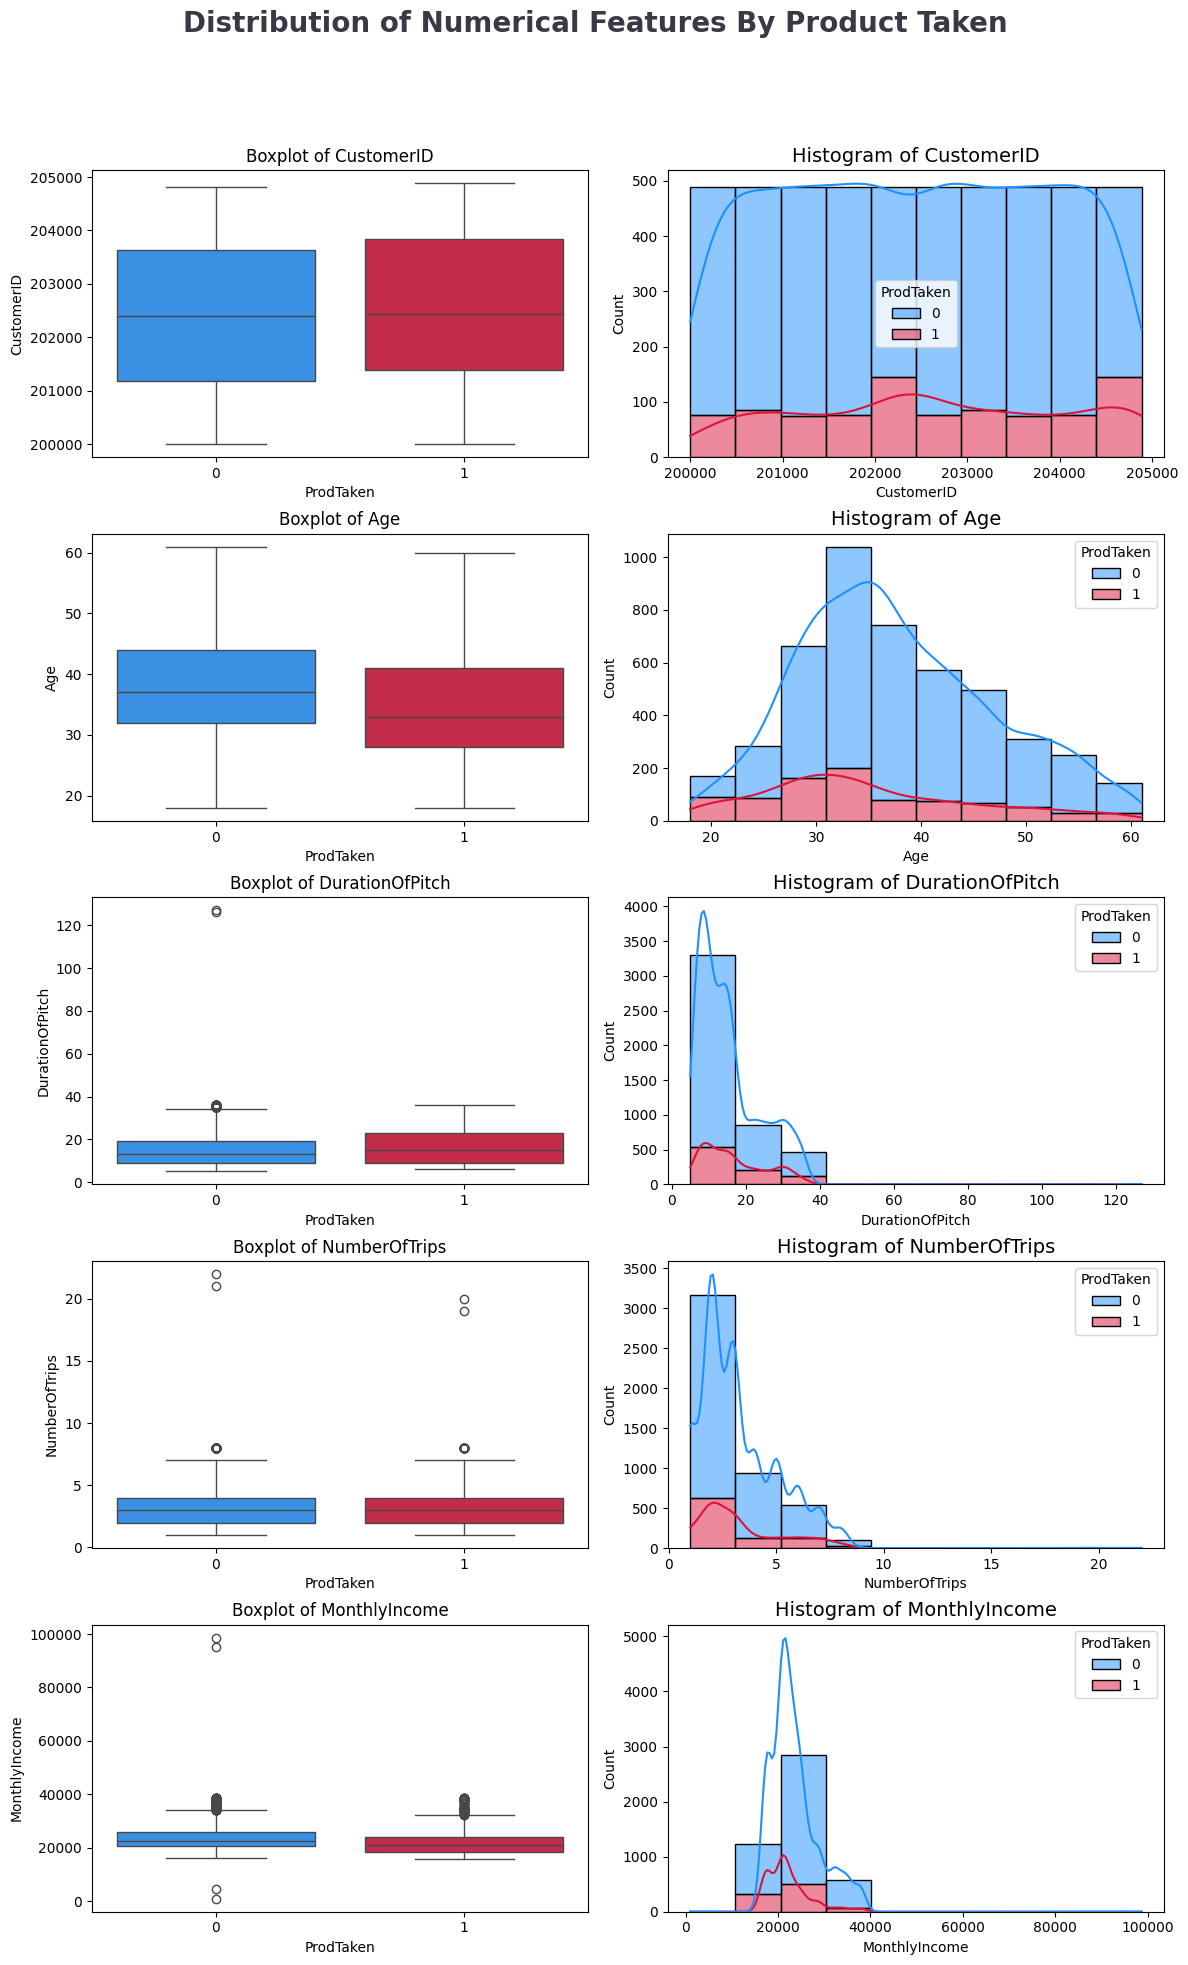

In [ ]:
clr1 =['#1E90FF','#DC143C']
fig,ax = plt.subplots(5,2,figsize = (12,20))
fig.suptitle('Distribution of Numerical Features By Product Taken',color = '#3C3744',fontsize = 20,fontweight = 'bold',ha ='center')
for i,col in enumerate(continuous_features):
  sns.boxplot(data = df,x = 'ProdTaken',y = col,palette =clr1,ax = ax[i,0])
  ax[i,0].set_title(f'Boxplot of {col}',fontsize = 12)
  sns.histplot(data = df,x = col,hue = 'ProdTaken',bins = 10,kde = True,multiple = 'stack',palette = clr1,ax = ax[i,1])
  ax[i,1].set_title(f'Histogram of {col}',fontsize = 14)
fig.tight_layout()
fig.subplots_adjust(top = 0.90)

Report:
* In the customerID column has unique value for each row,it can be ignored as a feature.
*Customers with montlyincome ranging from 15000-25000 re more likely buying travel packages.
*Pitch duration that sales team do under 20 minutes made more sales.

**Initial Analysis Report**

* There are missing values in the Age,DurationofPitch,NumberofFollowups,PreferredPropertyStar,Montlyincome,TypeofContact columns.
* the CustomerID column can be deleted because each row has unique values.
* The ProdTaken column in the target to predict.
* In the categorical column,feature can be entered,namely TypeofContact,Occupation,ProductPitched,MaritialStatus and Designation because based on the results of hypothesis testing using chisquare successfully rejects H0(meaning it is a corelated with the target)


**Visualization**

1.1 Visualize the Target Feature.

In [ ]:
df['ProdTaken'].value_counts() # 0 -Not-Purchased,1-Purchased

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [ ]:
df1 = df.copy()
df1['ProdTaken'] = np.where((df.ProdTaken == 1),'Purchased','Not_Purchased') # 0-Not_purchased,1-Purchased

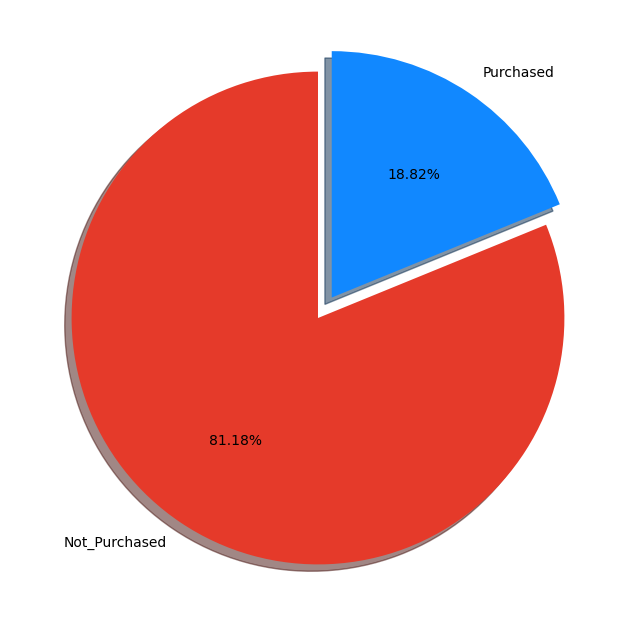

In [ ]:
percentage = df1.ProdTaken.value_counts(normalize = True)* 100
labels = ['Not_Purchased','Purchased']
# Plot Piechart
fig,ax =plt.subplots(figsize = (15,8))
explode =(0,0.1)
colors = ['#e53a2a','#1188ff']
ax.pie(percentage,labels = labels,startangle = 90,autopct = '%1.2f%%',explode = explode,shadow = True,colors = colors)
plt.show()

* From the chart if it is clear that the target variable is imbalanced.

**1.2 Do Men and Women who purchase more?**

In [ ]:
df1.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
df1[df1.ProdTaken == 'Purchased'].Gender.value_counts(normalize = True) * 100

Gender
Male       62.826087
Female     34.456522
Fe Male     2.717391
Name: proportion, dtype: float64

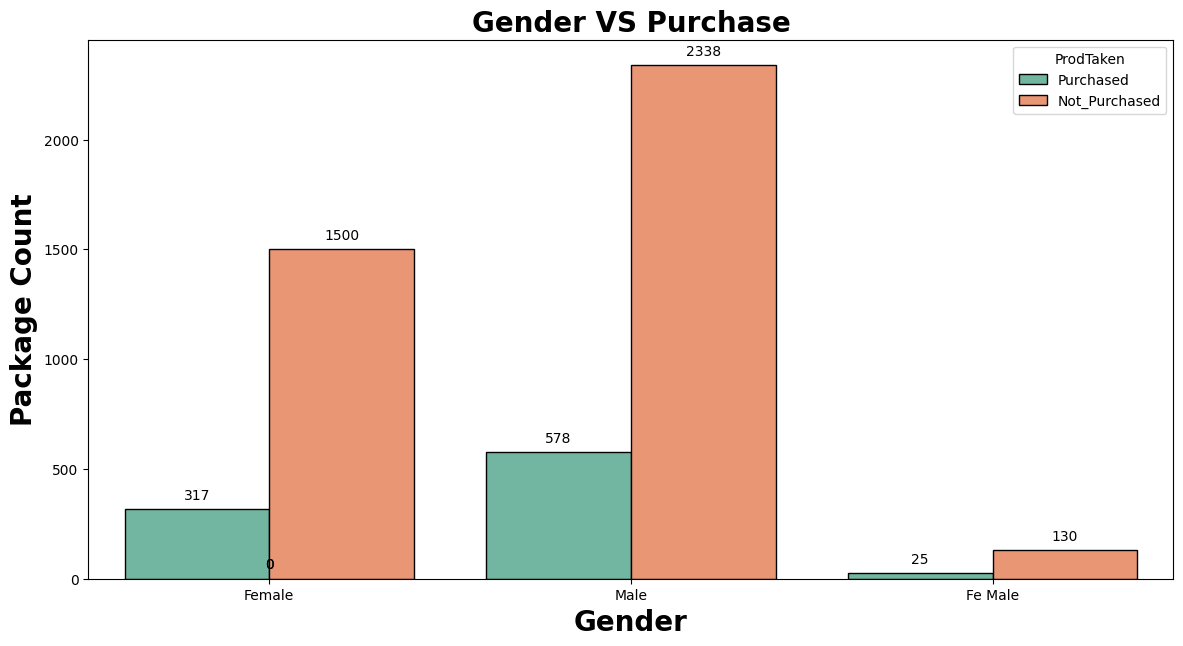

In [ ]:
plt.subplots(figsize = (14,7))
ax = sns.countplot(x = 'Gender',hue = 'ProdTaken',data = df1,ec = 'black',palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('Gender VS Purchase',weight = 'bold',fontsize = 20)
plt.ylabel('Package Count',weight = 'bold',fontsize = 20)
plt.xlabel('Gender',weight = 'bold',fontsize = 20)
plt.show()

**Report**

 * As per the barplot Male customer Purchased more than Female customers.
 * 37% Female customersand 63% men customers.
 * This feature has impact on the target variable.

**Age Category  Split**

In [ ]:
bins = [10,20,50,60]
labels = ['Teens','Adults','Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins = bins, labels = labels,right = False)
age_group = df.groupby(['AgeGroup','ProdTaken'])['CustomerID'].count().reset_index(name = 'TotalCustomer')
age_group

,AgeGroup,ProdTaken,TotalCustomer
0,Teens,0,17
1,Teens,1,29
2,Adults,0,3235
3,Adults,1,746
4,Senior,0,497
5,Senior,1,100


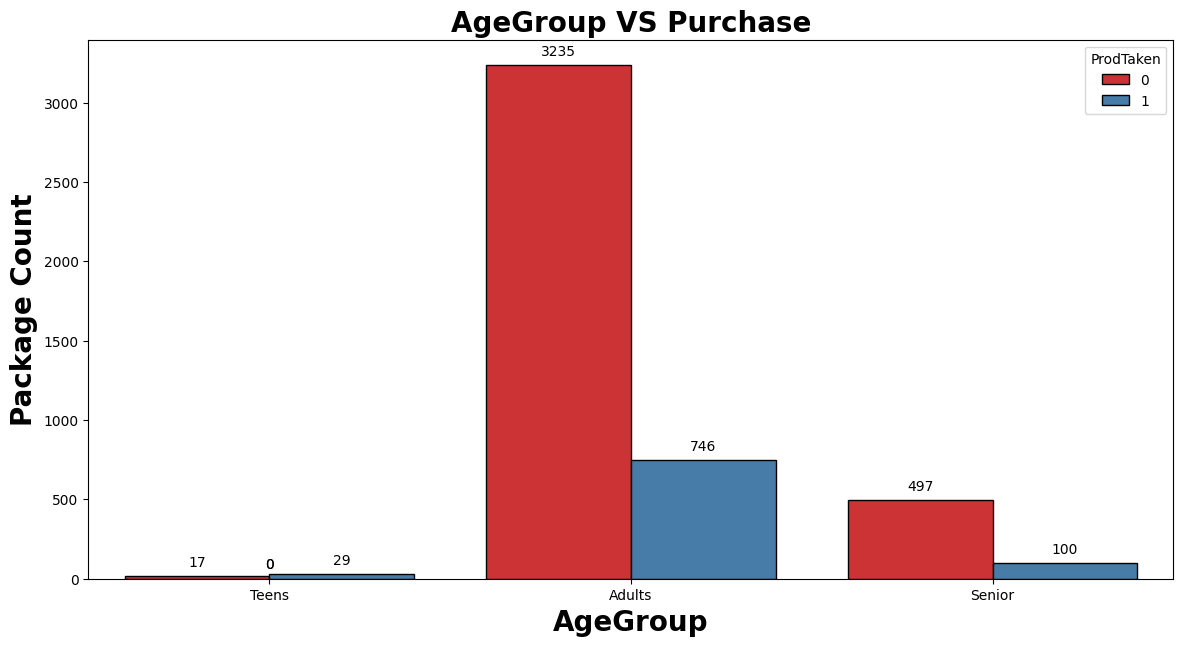

In [ ]:
plt.subplots(figsize = (14,7))
ax = sns.countplot(x = 'AgeGroup',hue = 'ProdTaken',data = df,ec = 'black',palette = 'Set1')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('AgeGroup VS Purchase',weight = 'bold',fontsize = 20)
plt.ylabel('Package Count',weight = 'bold',fontsize = 20)
plt.xlabel('AgeGroup',weight = 'bold',fontsize = 20)
plt.show()

**Report**

* As per the barplot Adults agegroup has the most share of purchase.
* The AgeGroup is 20-50 years old.

**1.3 Do MaritialStatus has anyeffect on Purchase of Product**

In [ ]:
df.groupby('MaritalStatus').ProdTaken.value_counts(normalize = True)

MaritalStatus  ProdTaken
Divorced       0            0.869474
               1            0.130526
Married        0            0.860684
               1            0.139316
Single         0            0.668122
               1            0.331878
Unmarried      0            0.756598
               1            0.243402
Name: proportion, dtype: float64

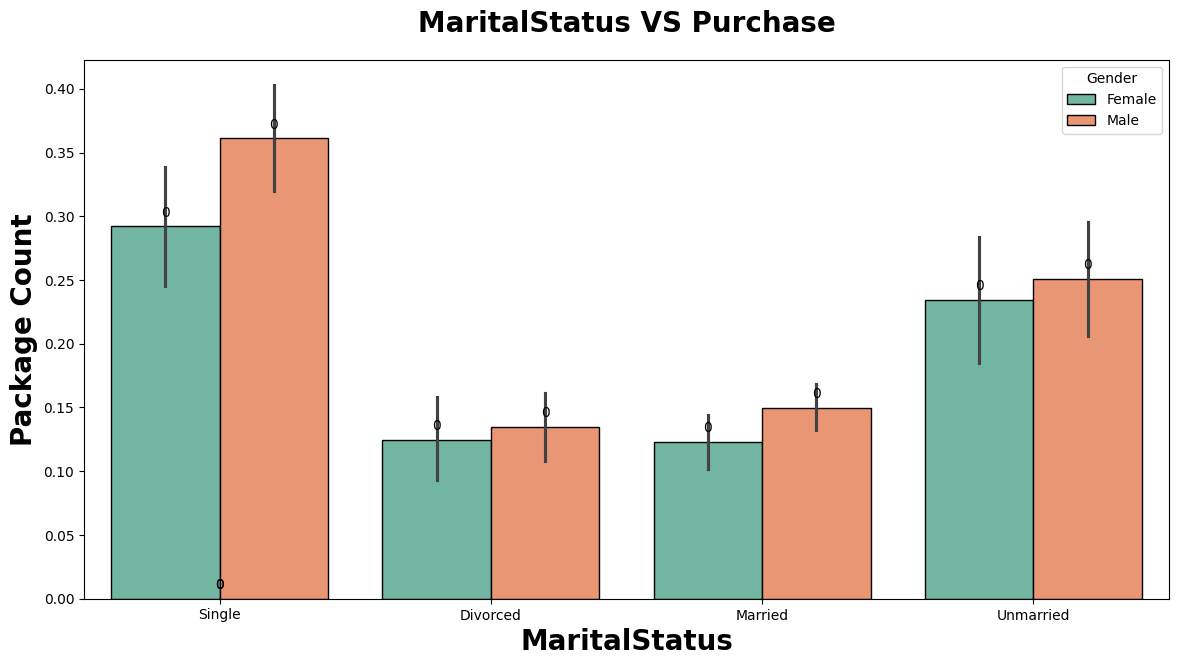

In [ ]:
plt.subplots(figsize = (14,7))
df['Gender'] = df['Gender'].replace('Fe Male','Female')
ax = sns.barplot(x = 'MaritalStatus',y = 'ProdTaken',hue = 'Gender',data = df,ec = 'black',palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('MaritalStatus VS Purchase',weight = 'bold',fontsize = 20,pad = 20)
plt.ylabel('Package Count',weight = 'bold',fontsize = 20)
plt.xlabel('MaritalStatus',weight = 'bold',fontsize = 20)
plt.show()

**Report**

* As per barplot Male and Female customers who are Single has purchased more than Divorced and Married and unmarried.
* 33.18% of single customer and 24% of Unmarried Customers.
* Followed by approximate 13% of Divorced and Married Customers.

**1.4 Duration of Pitch vs Product Purchase**

In [ ]:
df1['DurationOfPitch'].value_counts(normalize = True) * 100

DurationOfPitch
9.0      10.416217
7.0       7.375458
8.0       7.181367
6.0       6.620660
16.0      5.908993
15.0      5.801165
14.0      5.456114
10.0      5.262023
13.0      4.809144
11.0      4.420962
12.0      4.205305
17.0      3.709295
30.0      2.048738
22.0      1.919344
31.0      1.789950
23.0      1.703688
18.0      1.617425
29.0      1.595859
32.0      1.595859
25.0      1.574294
21.0      1.574294
27.0      1.552728
26.0      1.552728
24.0      1.509597
35.0      1.423334
20.0      1.401768
28.0      1.315506
33.0      1.229243
19.0      1.229243
34.0      1.078283
36.0      0.948889
5.0       0.129394
126.0     0.021566
127.0     0.021566
Name: proportion, dtype: float64

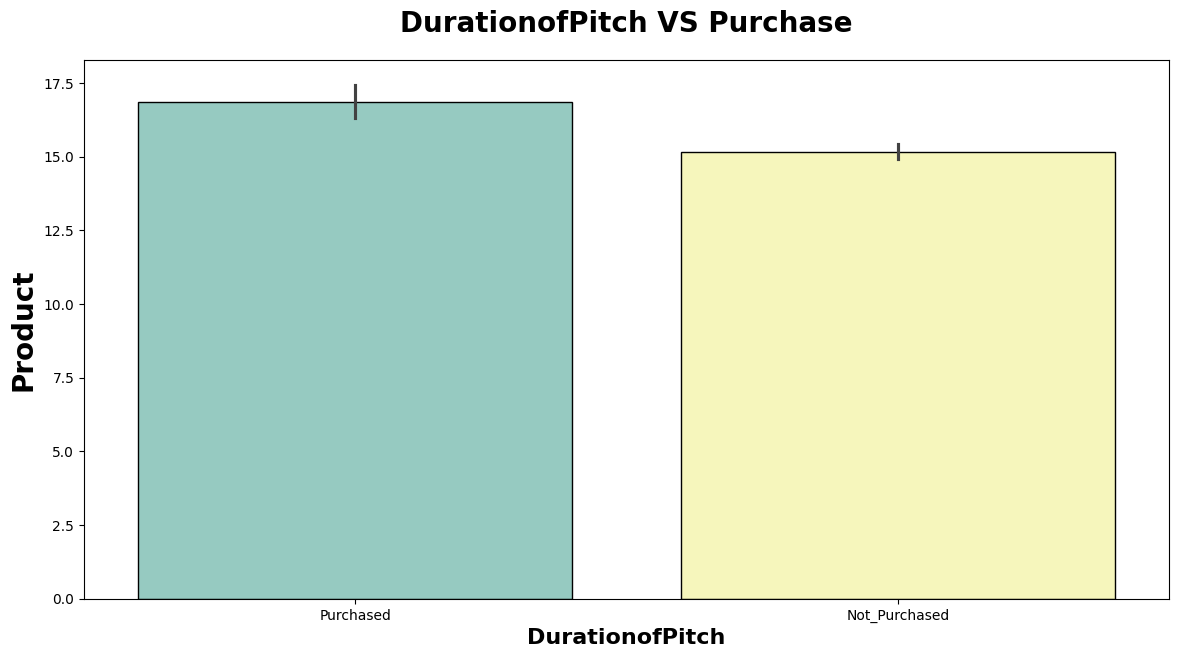

In [ ]:
plt.subplots(figsize = (14,7))
sns.barplot(x = 'ProdTaken',y = 'DurationOfPitch',data = df1,ec = 'black',palette = 'Set3')
plt.title('DurationofPitch VS Purchase',weight = 'bold',fontsize = 20,pad = 20)
plt.ylabel('Product',weight = 'bold',fontsize = 20)
plt.xlabel('DurationofPitch',weight = 'bold',fontsize = 16)
plt.show()

In [ ]:
pitch_less_10_and_taken = (df.loc[(df['DurationOfPitch']<10) & (df['ProdTaken'] == 1 )]).shape[0]
pitch_less_10_and_not_taken = (df.loc[(df['DurationOfPitch']<10) & (df['ProdTaken'] == 0 )]).shape[0]

pitch_between_10_30_and_taken = df.loc[(df['DurationOfPitch']<30) & (df['ProdTaken'] == 1 ) & (df['DurationOfPitch']>10)].shape[0]
pitch_between_10_30_and_not_taken = df.loc[(df['DurationOfPitch']<30) & (df['ProdTaken'] == 0) & (df['DurationOfPitch']>10)].shape[0]

pitch_more_than_30_and_taken = df.loc[(df['DurationOfPitch']>30) & (df['ProdTaken'] == 1 )].shape[0]
pitch_more_than_30_and_not_taken = df.loc[(df['DurationOfPitch']>30) & (df['ProdTaken'] == 0)].shape[0]


total_package_taken = (df.loc[(df['ProdTaken'] == 1 )]).shape[0]

print(f"Total {pitch_less_10_and_taken + pitch_less_10_and_not_taken} Pitch for less than 10 minutes and {pitch_less_10_and_taken} were bought which is about {pitch_less_10_and_taken/(pitch_less_10_and_taken + pitch_less_10_and_not_taken):.2f}%")
print(f"Total {pitch_between_10_30_and_taken + pitch_between_10_30_and_not_taken} Pitch for between 10 and 30 minutes and {pitch_between_10_30_and_taken} were bought which is about {pitch_between_10_30_and_taken/(pitch_between_10_30_and_taken + pitch_between_10_30_and_not_taken):.2f}%")
print(f"Total {pitch_more_than_30_and_taken + pitch_more_than_30_and_not_taken} Pitch for more than 30 minutes and {pitch_more_than_30_and_taken} were bought which is about {pitch_more_than_30_and_taken/(pitch_more_than_30_and_taken + pitch_more_than_30_and_not_taken):.2f}%")

Total 1471 Pitch for less than 10 minutes and 226 were bought which is about 0.15%
Total 2451 Pitch for between 10 and 30 minutes and 488 were bought which is about 0.20%
Total 376 Pitch for more than 30 minutes and 86 were bought which is about 0.23%


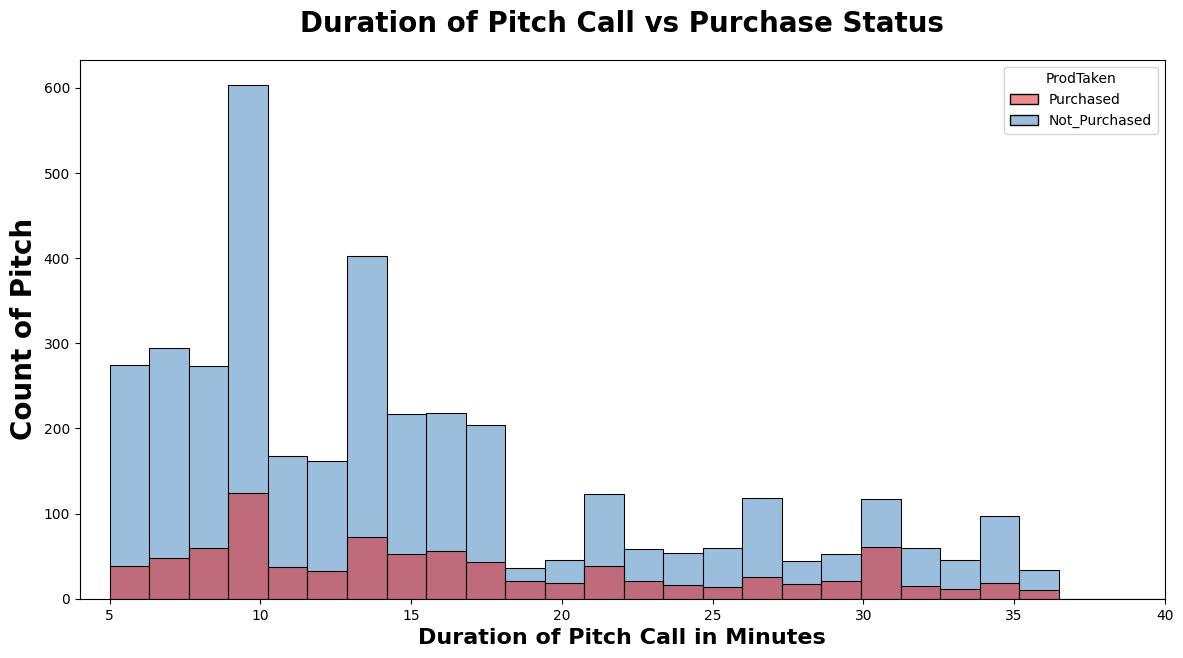

In [ ]:
plt.subplots(figsize=(14,7))
sns.histplot(x="DurationOfPitch", data=df1,palette="Set1", hue="ProdTaken")
plt.title("Duration of Pitch Call vs Purchase Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count of Pitch", weight="bold", fontsize=20)
plt.xlabel("Duration of Pitch Call in Minutes", weight="bold", fontsize=16)
plt.xlim(4,40)
plt.show()

In [ ]:
print(f"Out of total {total_package_taken} packages, \n {pitch_less_10_and_taken/total_package_taken:.2f}% comes from talking less than 10 minutes,\n {pitch_between_10_30_and_taken/total_package_taken:.2f}% comes from talking between 10 minutes and 30 minutes,\n {pitch_more_than_30_and_taken/total_package_taken:.2f}% comes from talking more than 30 minutes")

Out of total 920 packages, 
 0.25% comes from talking less than 10 minutes,
 0.53% comes from talking between 10 minutes and 30 minutes,
 0.09% comes from talking more than 30 minutes


**Report **
* As per chart DurationofPitch has impact on target vlue.
* 57% of Package sold were Pitched between 10 minutes and 30 minutes.

In [ ]:
df1.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

**1.5 Number of Personvisiting Vs ProductPurchasse.**

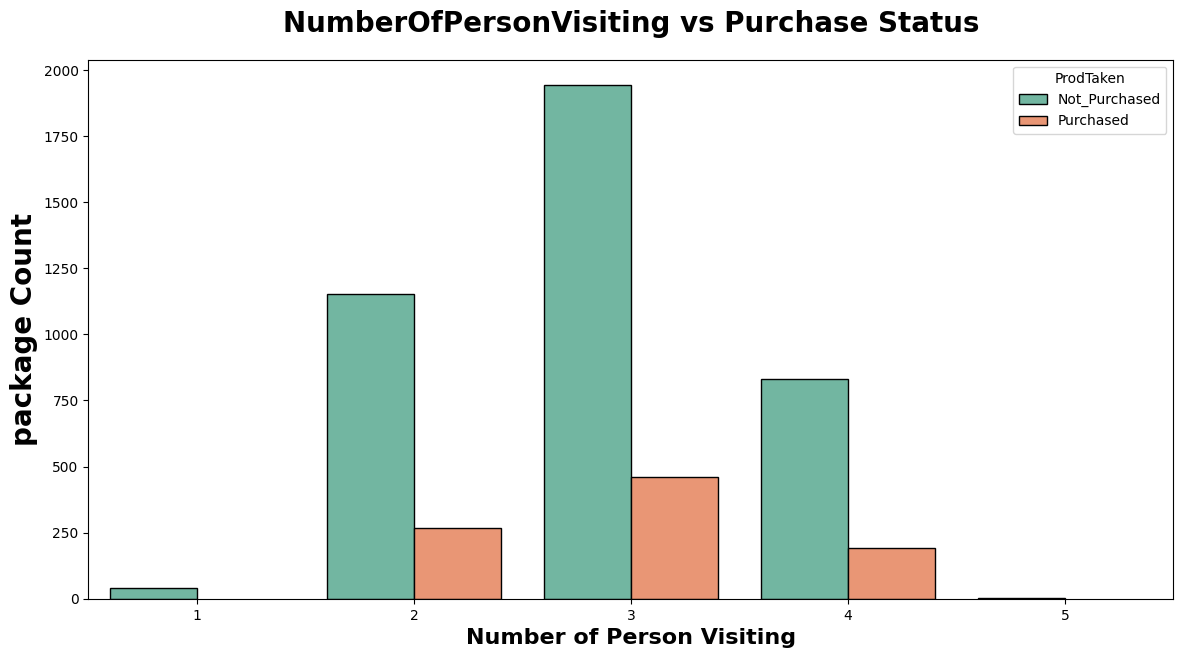

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="NumberOfPersonVisiting",hue = 'ProdTaken' ,data=df1,ec = 'black',palette="Set2")
plt.title("NumberOfPersonVisiting vs Purchase Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("package Count", weight="bold", fontsize=20)
plt.xlabel("Number of Person Visiting", weight="bold", fontsize=16)
plt.show()

**Report**

* As per the Chart Most Purchase were from 3 People. That might be 3 Unmarried Friends or a Family with Couple and a Child.
* Followed by 2 Number of Person.

**1.6.Number of Sales Followup vs Product Purchase.**

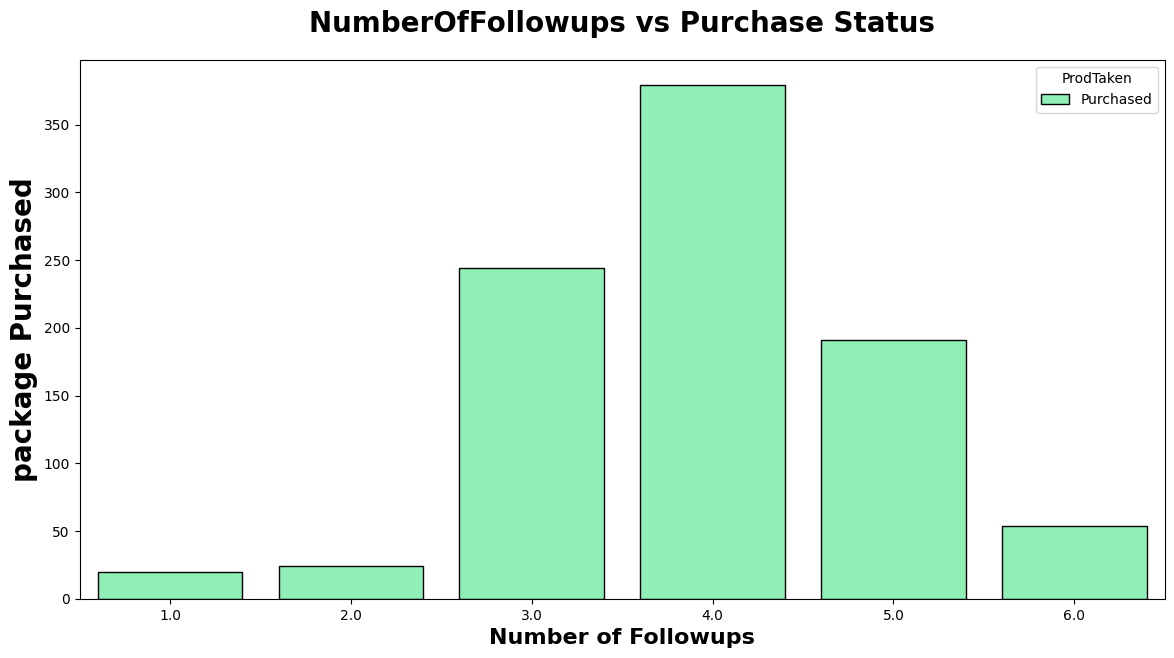

In [ ]:
df2 = df1[df1['ProdTaken']== 'Purchased']
plt.subplots(figsize=(14,7))
sns.countplot(x="NumberOfFollowups",hue = 'ProdTaken' ,data=df2,ec = 'black',palette="rainbow_r")
plt.title("NumberOfFollowups vs Purchase Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("package Purchased", weight="bold", fontsize=20)
plt.xlabel("Number of Followups", weight="bold", fontsize=16)
plt.show()

**Report**

* As per the chart if Sales team Followups like 4 times gets more Purchasing.

In [ ]:
for i in range(1,7):
  followup_taken = df.loc[(df1['NumberOfFollowups']==i) & (df1['ProdTaken'] == 'Purchased')].shape[0]
  followup_all = df.loc[(df1['NumberOfFollowups'] == i)].shape[0]
  followup_ratio = followup_taken/followup_all
  print(f'For the follow up {i} Time,total number is {followup_all} and ratio is {followup_ratio : .2f}%')

For the follow up 1 Time,total number is 176 and ratio is  0.11%
For the follow up 2 Time,total number is 229 and ratio is  0.10%
For the follow up 3 Time,total number is 1466 and ratio is  0.17%
For the follow up 4 Time,total number is 2068 and ratio is  0.18%
For the follow up 5 Time,total number is 768 and ratio is  0.25%
For the follow up 6 Time,total number is 136 and ratio is  0.40%


**Report**

* Very few inquires has been followed for 6 times,and they have the highest ratio.
* It seems like in the secondfollowups,people confused and had less purchase.

1.7 City Tier Vs Purchase Status

In [ ]:
df1.groupby('CityTier').ProdTaken.value_counts()

CityTier  ProdTaken    
1         Not_Purchased    2670
          Purchased         520
2         Not_Purchased     152
          Purchased          46
3         Not_Purchased    1146
          Purchased         354
Name: count, dtype: int64

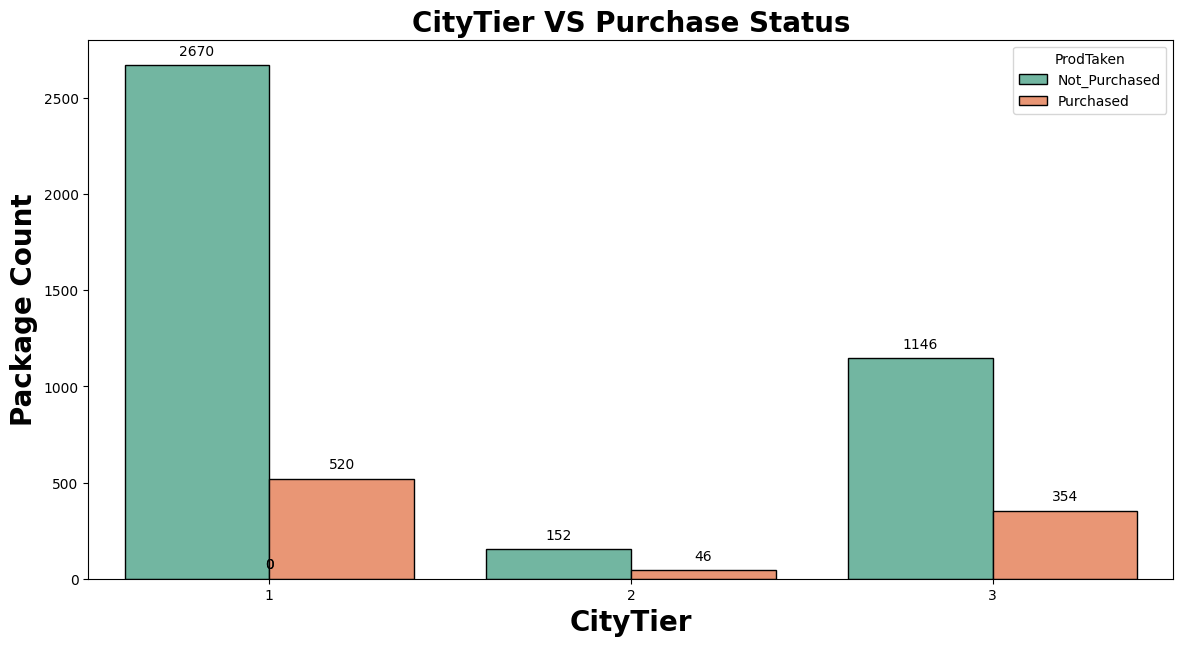

In [ ]:
plt.subplots(figsize = (14,7))
ax = sns.countplot(x = 'CityTier',hue = 'ProdTaken',data = df1,ec = 'black',palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('CityTier VS Purchase Status',weight = 'bold',fontsize = 20)
plt.ylabel('Package Count',weight = 'bold',fontsize = 20)
plt.xlabel('CityTier',weight = 'bold',fontsize = 20)
plt.show()

**Report**

* Many Customers are from Citytier 1 compared to each other.
* Citytier has very good impact on target variable.

1.7 Occupation Vs Product Purchase

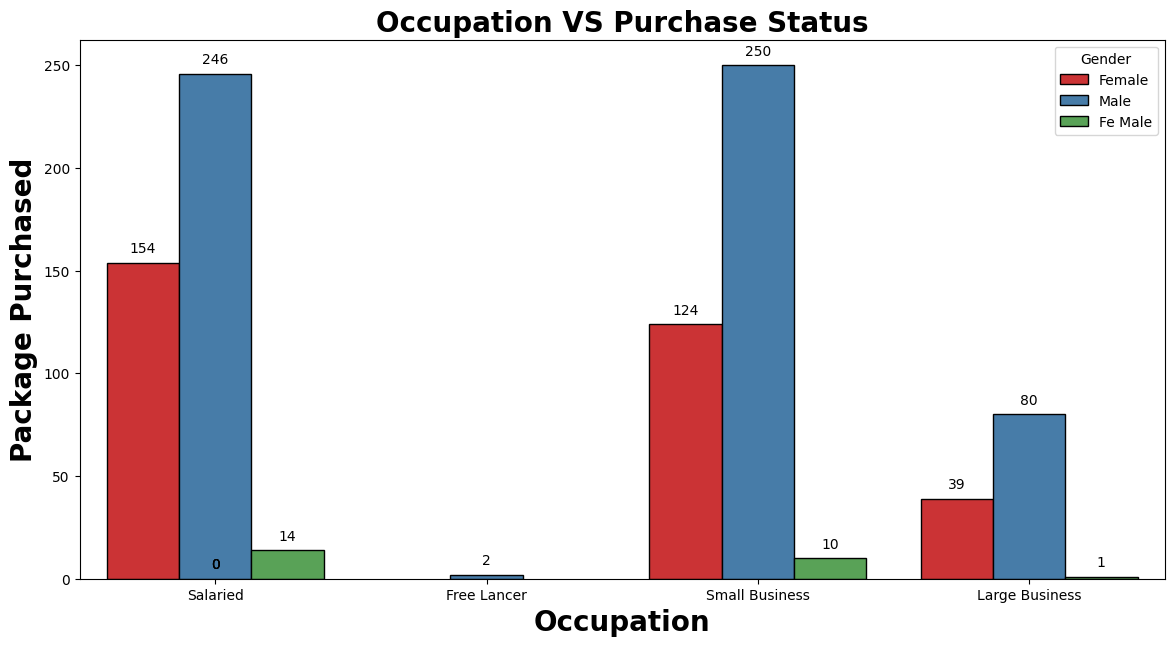

In [ ]:
plt.subplots(figsize = (14,7))
ax = sns.countplot(x = 'Occupation',hue = 'Gender',data = df2,ec = 'black',palette = 'Set1')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('Occupation VS Purchase Status',weight = 'bold',fontsize = 20)
plt.ylabel('Package Purchased',weight = 'bold',fontsize = 20)
plt.xlabel('Occupation',weight = 'bold',fontsize = 20)
plt.show()

**Report**

* As per barchart the  Small Bussiness Male is purchased more than Salaried Male.
*  We can see Salaried Females ha salaried female purchased more than the small Bussiness Females.
* Followed by LargeBussiness and Freelauncing.

**1.8 Product Pitched and Product's Status**

**Product pitched with Purchase**

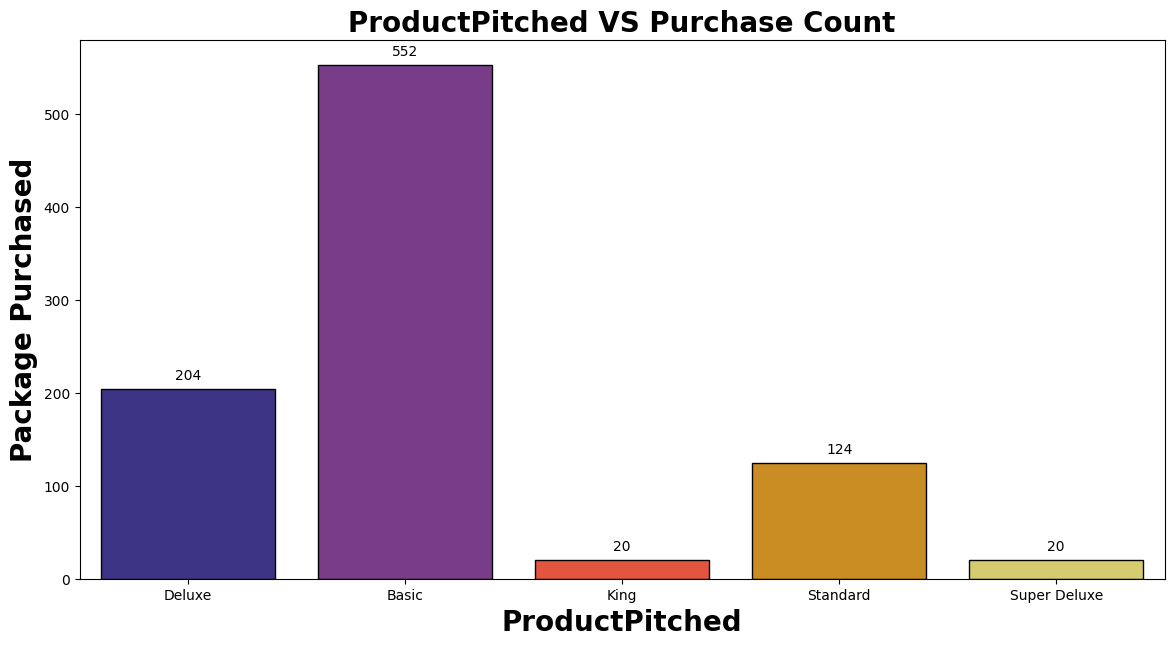

In [ ]:
plt.subplots(figsize = (14,7))
ax = sns.countplot(x = 'ProductPitched',data = df2,ec = 'black',palette = 'CMRmap')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('ProductPitched VS Purchase Count',weight = 'bold',fontsize = 20)
plt.ylabel('Package Purchased',weight = 'bold',fontsize = 20)
plt.xlabel('ProductPitched',weight = 'bold',fontsize = 20)
plt.show()

**Report**

* Basic Package was the most preferred package by customers.
* Deluxe is the second more purchase package.

productpitched with Notpurchase

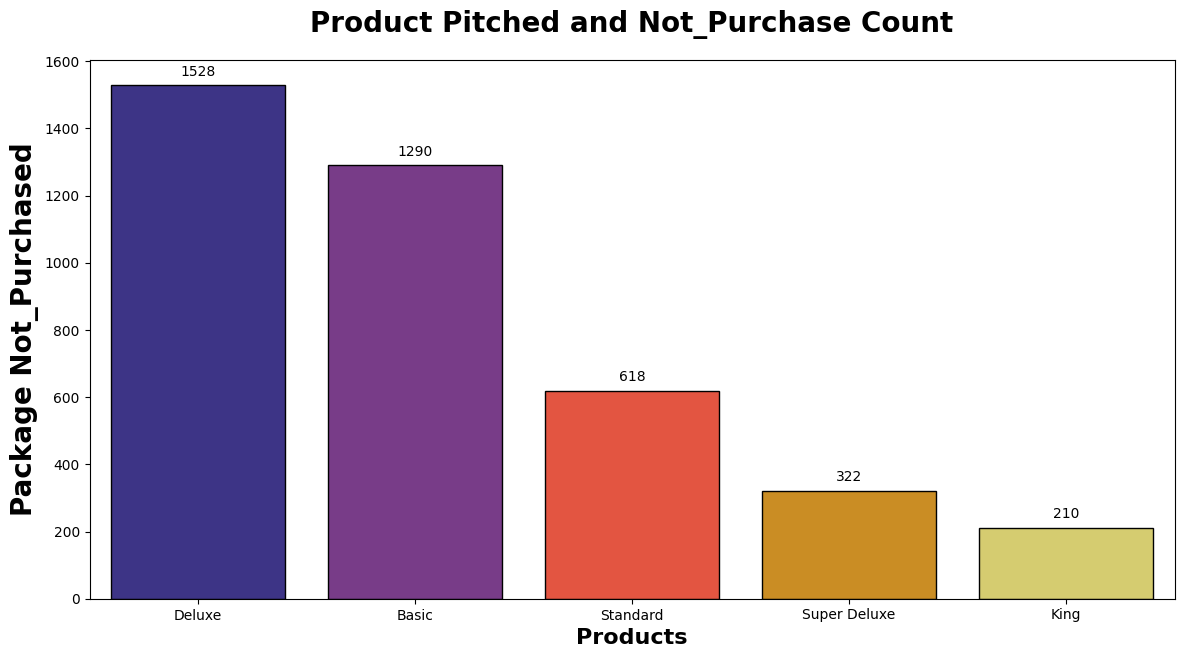

In [ ]:
df6 = df1[df1['ProdTaken']== 'Not_Purchased']
plt.subplots(figsize=(14,7))
ax = sns.countplot(x="ProductPitched", data= df6,ec = "black",palette="CMRmap")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title("Product Pitched and Not_Purchase Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Not_Purchased", weight="bold", fontsize=20)
plt.xlabel("Products", weight="bold", fontsize=16)
plt.show()

**Report**

* Deluxe package was the most patched by sales yet people didn't buy.
* Reducing the cost of Deluxe Package might help in getting successfully sales pitch.

**1.9 Preferred Property Star Vs Product Purchase**

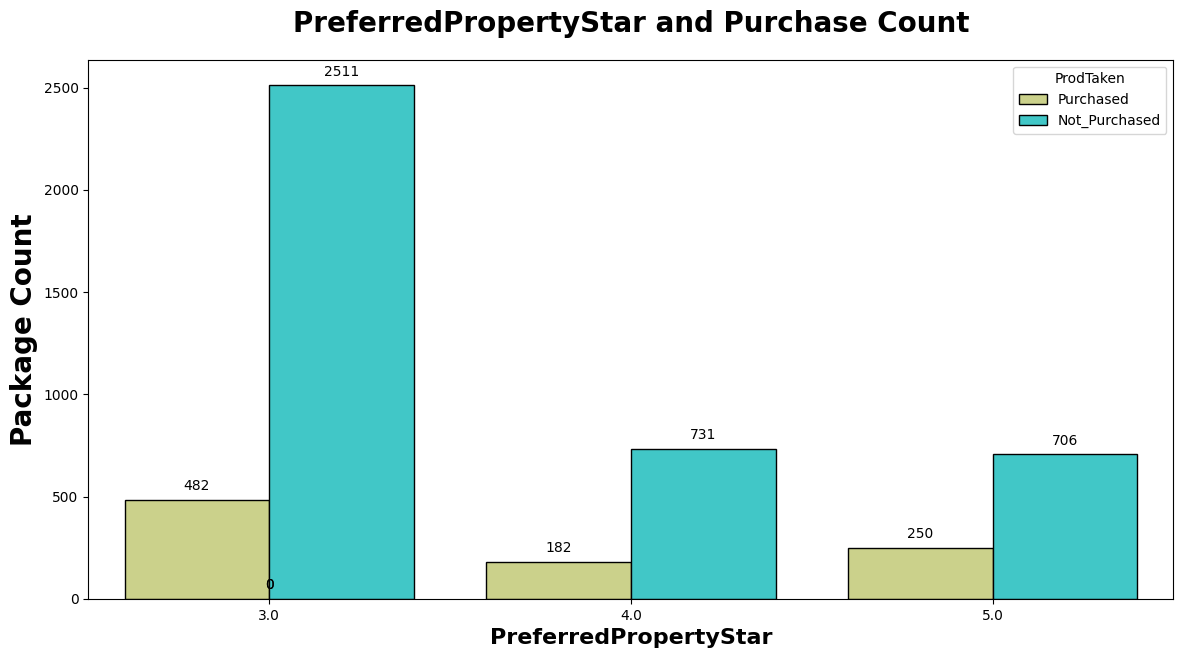

In [ ]:
plt.subplots(figsize=(14,7))
ax = sns.countplot(x="PreferredPropertyStar",hue = 'ProdTaken', data= df1,ec = "black",palette="rainbow_r")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title("PreferredPropertyStar and Purchase Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("PreferredPropertyStar", weight="bold", fontsize=16)
plt.show()

**Report**

 * People preferred 3StarHotels followed by 5 stars and 4 Stars

**1.10 Passport Vs PackagePurchase**

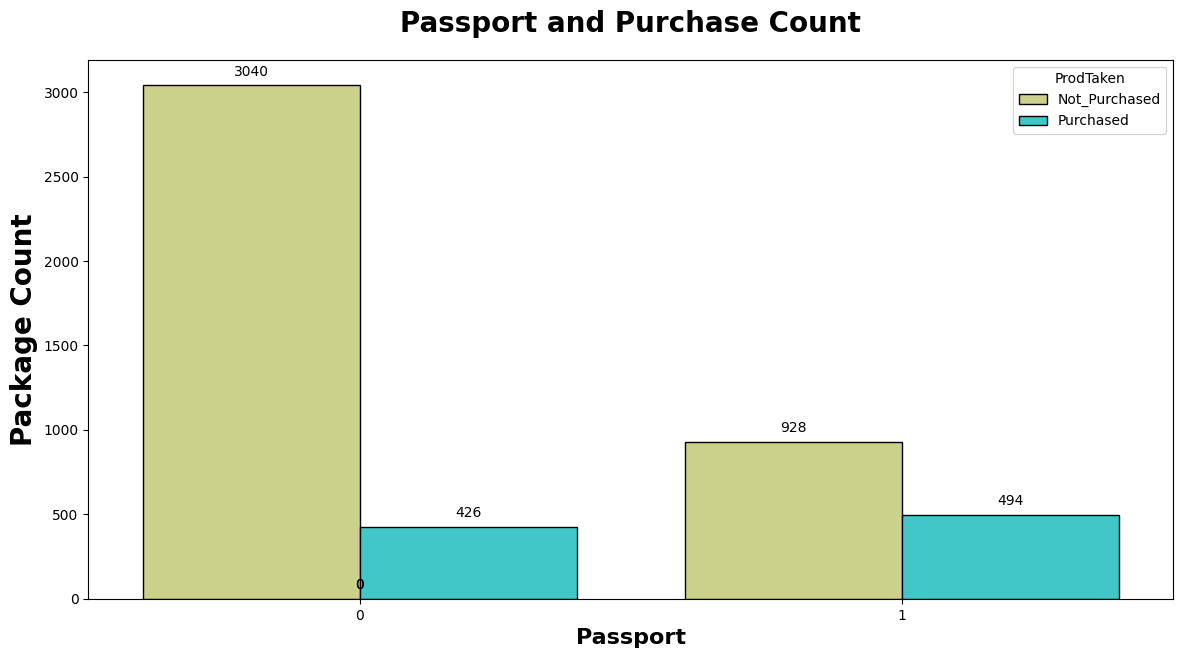

In [ ]:
plt.subplots(figsize=(14,7))
ax = sns.countplot(x="Passport",hue = 'ProdTaken', data= df1,ec = "black",palette="rainbow_r")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title("Passport and Purchase Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Passport", weight="bold", fontsize=16)
plt.show()

**Report**

* People Most people who had passport has purchased.
* People with No passport mostly didn't purchased the package.

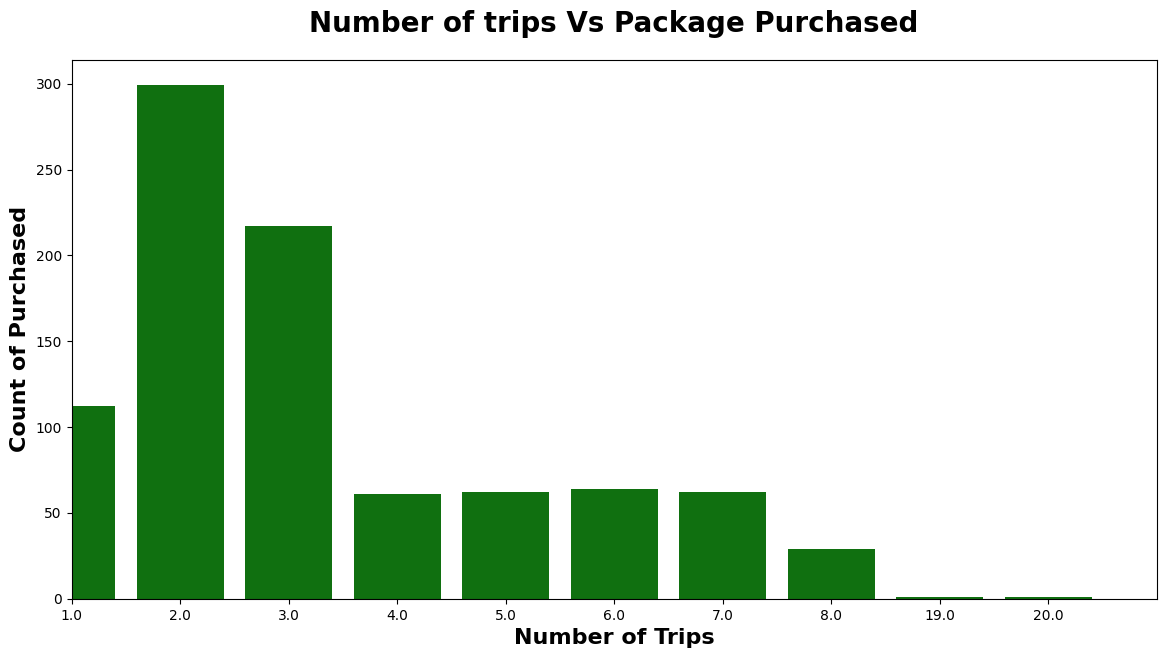

In [ ]:
# plot LineChart
plt.figure(figsize=(14,7))
sns.countplot(x = df2.NumberOfTrips,color = 'g')
plt.title('Number of trips Vs Package Purchased',weight = 'bold',fontsize =20,pad = 20)
plt.xlabel('Number of Trips',weight ='bold',fontsize = 16)
plt.ylabel('Count of Purchased',weight = 'bold',fontsize = 16)
plt.xlim(0,10)
plt.show()

**Report**

* People  with 2Trips had more purchases.
* People with more than 8 trips make no purchase.

**1.11 Own Car vs Product Purchase**

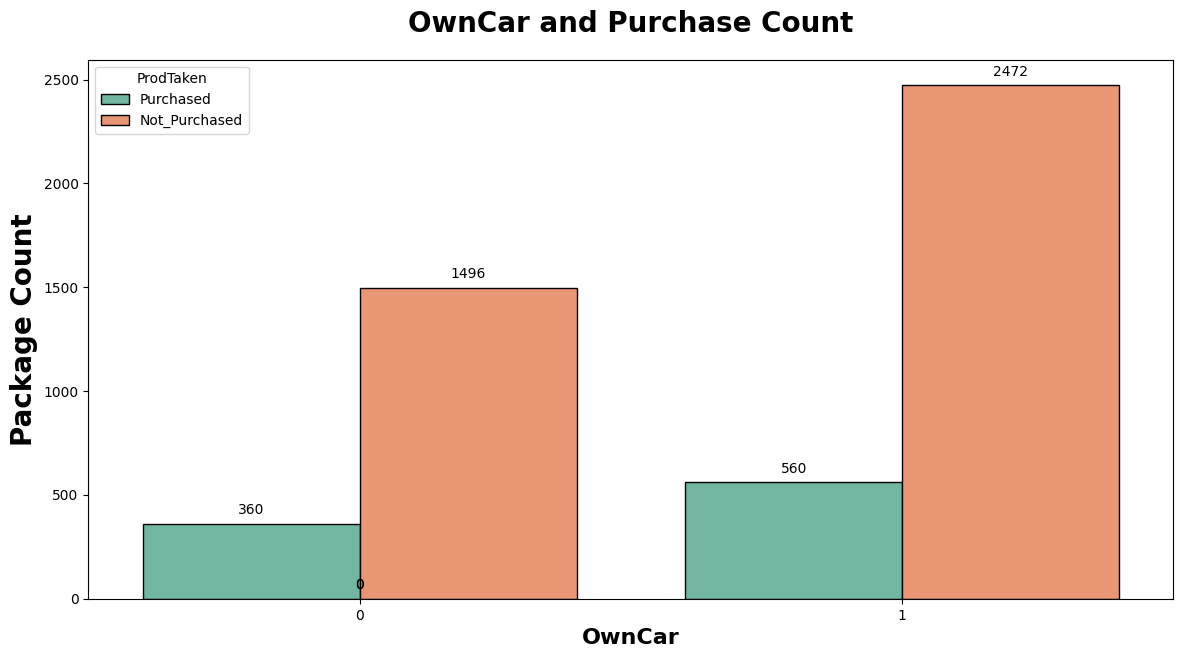

In [ ]:
plt.subplots(figsize=(14,7))
ax = sns.countplot(x="Passport",hue = 'ProdTaken', data= df1,ec = "black",palette="rainbow_r")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title("Passport and Purchase Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Passport", weight="bold", fontsize=16)
plt.show()

**Report**

* People with Car has purchased the packages more,also show their income is in higher category.

**1.12 Number of Children visit vs Package Purchase**

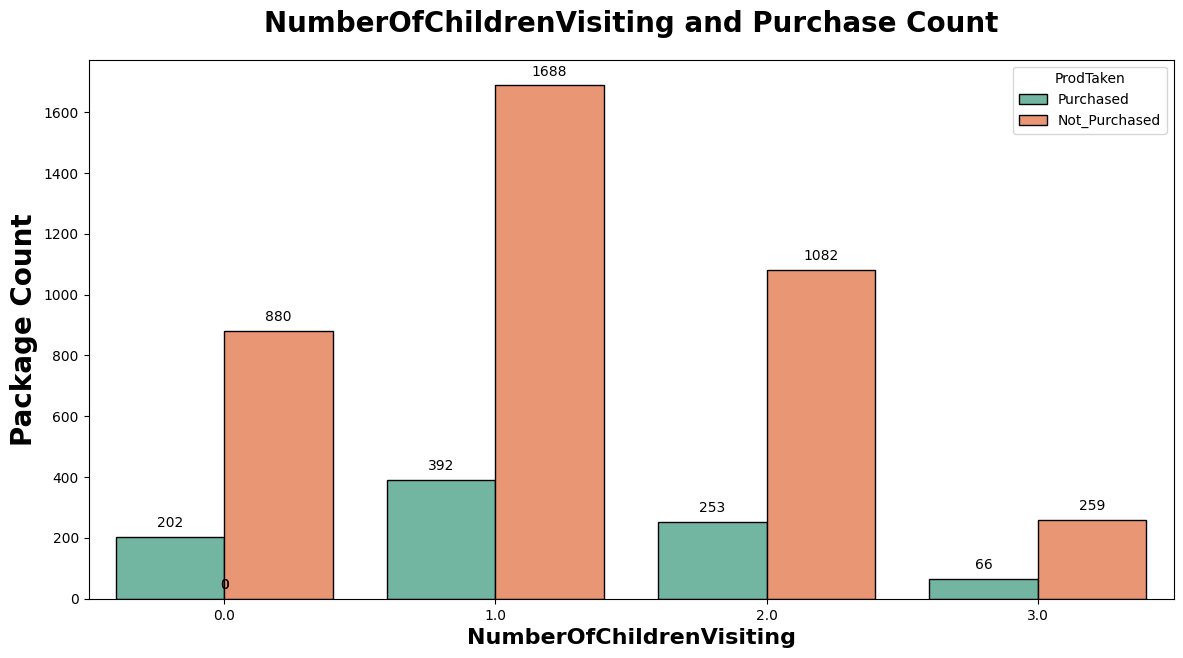

In [ ]:
plt.subplots(figsize=(14,7))
ax = sns.countplot(x="NumberOfChildrenVisiting",hue = 'ProdTaken', data= df1,ec = "black",palette="Set2")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title("NumberOfChildrenVisiting and Purchase Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("NumberOfChildrenVisiting", weight="bold", fontsize=16)
plt.show()

**Report**

* People with 1 children has purchased the package more,just like what we saw in Number of person visiting it was 3 people package which was sold more,it will be married Couple with 1 child.

1.13 Designation Vs Product Purchased

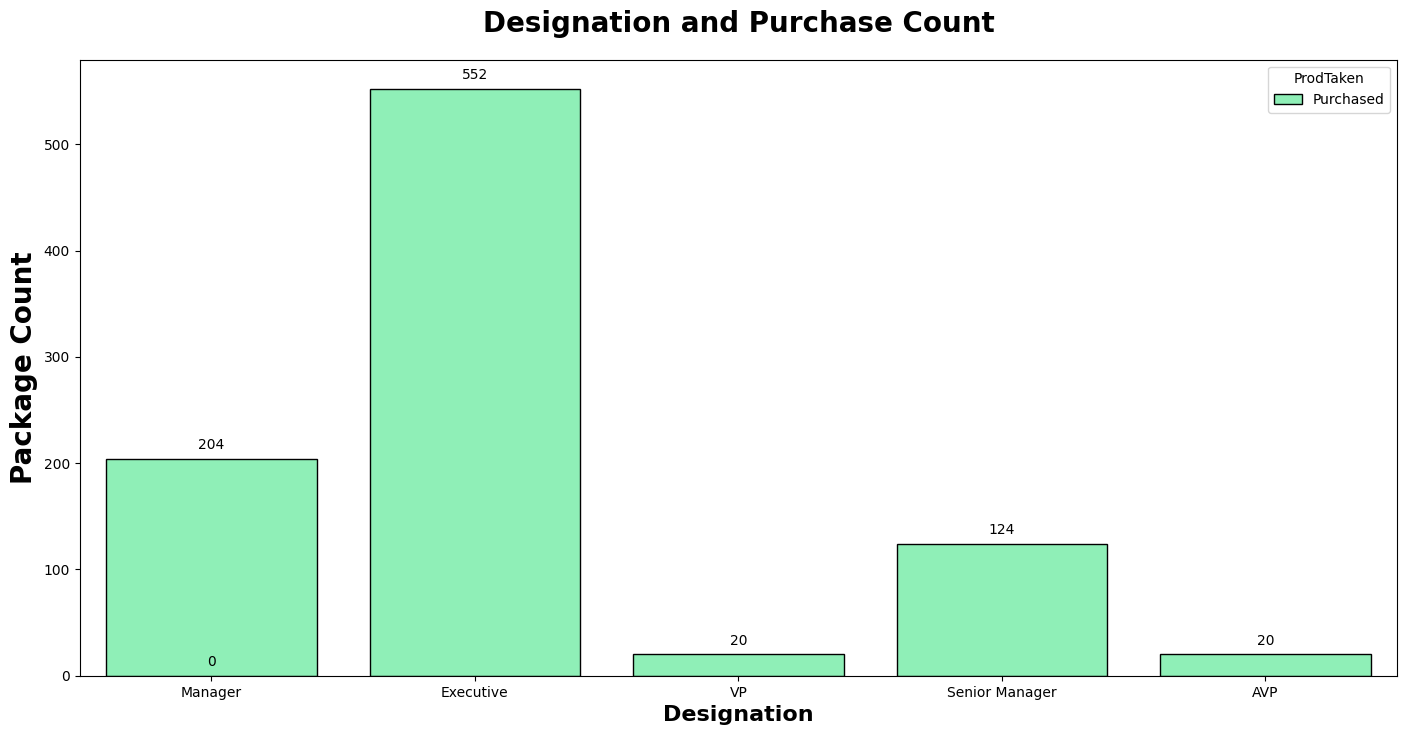

In [ ]:
plt.subplots(figsize=(17,8))
ax = sns.countplot(x="Designation",hue = 'ProdTaken', data= df2,ec = "black",palette="rainbow_r")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title("Designation and Purchase Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Designation", weight="bold", fontsize=16)
plt.show()

**Report**

* Executive have purchased the product more than other designation people.
This feature hasvery good impact on target variables.


**Final Report**


* The column names and datatypes are correct,but there spelling errors in the Gender Column.
* The `ProdTaken` column is the target to predict.
* There are outliers in the `DurationOfPitch, NumberOfTrips, MonthlyIncome` columns.
* The `NumberOfPersonVisiting and NumberOfChildrenVisiting` columns have a positive correlation they can be combined to form a new feature
* Follow Ups on sales pitch more than 3 times has given good results.
* Numeric fields that appear to have a correlation to the target can be used as features, namely `Age`, `MontlyIncome`, `NumberOfFollowups` and `Passport`.
* Sales Pitch for 5 to 20 minutes is a very good range.
* Some numeric columns that appear completely uncorrelated to the target can be deleted.